#### Langlet Maxime & Weinberg Lucas
#### PHYS-F303
#### Travail personnel


# Introduction

Nous allons exposons dans ce travail la réponse aux questions et challenges exposés dans les 4 notebook du répertoire "Monte-Carlo" disponible à l'adresse suivante 

https://github.com/bknaepen/numerical-mooc.git 

Le premier notebook étant dépourvu de questions ou challenges, nous commençons directement aux 2ème.

In [12]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from math import*
import timeit

# Notebook 6.2 : Random numbers

## La distribution uniforme

### Un algorithme peut-il vraiment être aléatoire (i.e.: numpy.random.random_sample()) ?

Non, un algorithme est déterministe par nature. 
"numpy.random.random_sample()" par exemple, est un algorithme périodique qui crée une énorme liste de nombre compris entre [0,1) dont la distribution de probabilitée est similaire à celle d'une distribution uniforme sur cette interval.
Cependant cet algorithme nécessite un point de départ dans la liste de nombre qu'il génère. Celui-ci étant en générale choisi au lancement du kernel à l'aide d'une donnée aléatoire extérieur tel que l'heure et la date.
Nous bénéficions d'ailleurs d'une commande afin de choisir le point de départ dans la séquence de chiffre généré par cet algorithme "numpy.random.seed()".

Vérifions tout cela :

In [13]:
x=numpy.random.random_sample(10)
print(x)
x=numpy.random.random_sample(10)
print(x)

#choisissons le point de départ maintenant

numpy.random.seed(0) 
x=numpy.random.random_sample(10)
print(x)
numpy.random.seed(0)
x=numpy.random.random_sample(10)
print(x)

[ 0.26817453  0.75422242  0.39979511  0.70526879  0.72669552  0.92350967
  0.20720835  0.55495896  0.2897572   0.54655754]
[ 0.64025678  0.05382402  0.67254543  0.55295021  0.85650177  0.96733863
  0.44404335  0.55981134  0.2166868   0.62428581]
[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548   0.64589411
  0.43758721  0.891773    0.96366276  0.38344152]
[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548   0.64589411
  0.43758721  0.891773    0.96366276  0.38344152]


Une fois un point de départ choisis on remarque donc que notre algorithme est donc bien déterministe. 

Il peut aussi être intéressant de remarqué la propriété suivante de notre générateur de nombre "aléatoire":

In [14]:
numpy.random.seed(0)
x=numpy.random.random_sample(5)
print(x)
x=numpy.random.random_sample(5)
print(x)
numpy.random.seed(0)
x=numpy.random.random_sample(10)
print(x)

[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
[ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]
[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548   0.64589411
  0.43758721  0.891773    0.96366276  0.38344152]


On remarque qu'après utilisation de l'algorithme le nouveau point de départ pour la prochaine utilisation de celui-ci sera le nombre suivant de notre liste prédéfinie de nombres.

Vérifions maintenant que sa distribution ressemble à une distribution uniforme :

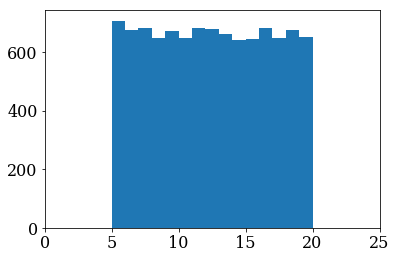

In [15]:
a=5
b=20
x = numpy.random.random_sample(10000)
y = (b-a)*x+a
binwidth=1
pyplot.xlim(0,25)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=False);

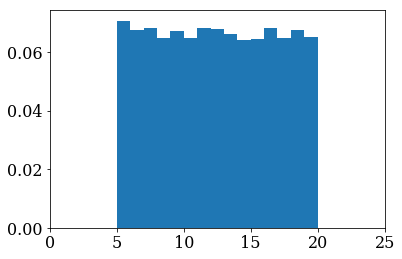

In [16]:
pyplot.xlim(0,25)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

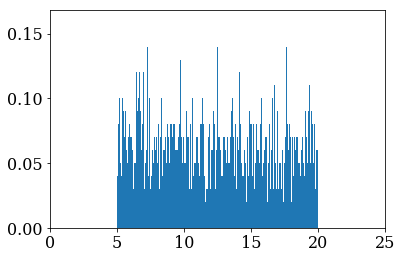

In [17]:
x = numpy.random.random_sample(10000)
binwidth=0.01
pyplot.xlim(0,25)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

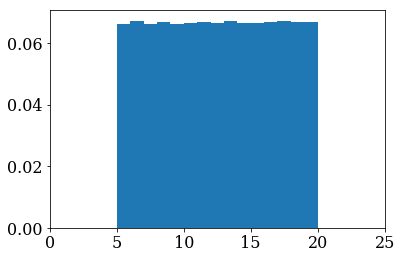

In [18]:
x = numpy.random.random_sample(1000000)
y = (b-a)*x+a
binwidth=1
pyplot.xlim(0,25)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

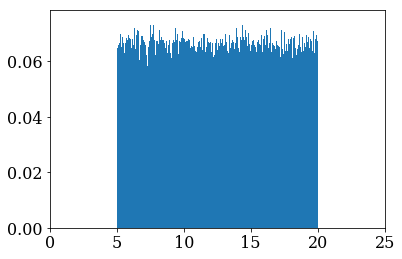

In [19]:
x = numpy.random.random_sample(1000000)
y = (b-a)*x+a
binwidth=0.01
pyplot.xlim(0,25)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

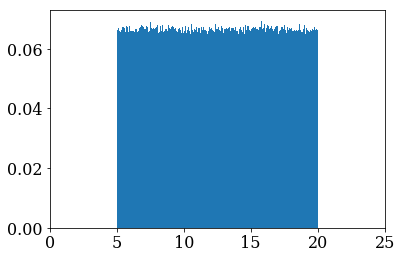

In [20]:
x = numpy.random.random_sample(10000000)
y = (b-a)*x+a
binwidth=0.01
pyplot.xlim(0,25)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

La distribution converge effectivement vers une distribution uniforme lorsqu'on augmente le nombre de point et lorsqu'on réduit la taille du bining.

## Génération des autres distributions

### Méthode de la distribution inverse

nous reprenons ici l'agorithme disponible dans le MOOC 

Size of accepted set h and expected size 1/K: 71583 71428.57142857143


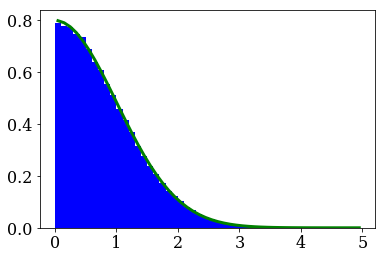

In [21]:
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


### Méthode de réjection de Von Neumann

Nous reprenons à nouveau ici l'algorithme mis à disposition dans le MOOC

Acceptance ratio: 0.7132


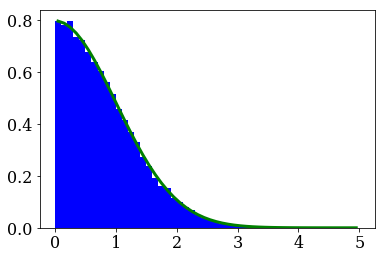

In [22]:
# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

## Challenges

### 1) Comparaison avec les  fonctions implémentées dans python

Commençons par comparer la méthode de la fonction inverse pour l'exponentielle avec celle implémentée dans python "numpy.random.exponential()":

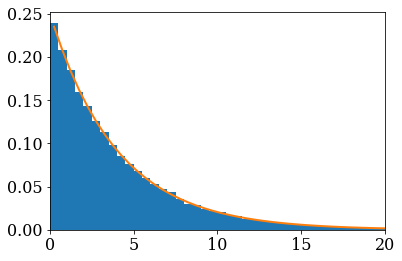

In [24]:
alpha = 0.25 
numpy.random.seed(0)
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Comparons les valeurs obtenues par cette algorithme avec ceux obtenu par notre fonction préfaite

In [25]:
numpy.random.seed(0)
y=numpy.random.exponential(0.25,10)
print(y)
numpy.random.seed(0)
x = numpy.random.random_sample(10)
y = -0.25*numpy.log(1-x)
print(y)

[ 0.19896863  0.31398269  0.23080579  0.19680029  0.13776212  0.25953982
  0.1438798   0.5558811   0.82872805  0.12090053]
[ 0.19896863  0.31398269  0.23080579  0.19680029  0.13776212  0.25953982
  0.1438798   0.5558811   0.82872805  0.12090053]


On obtient exactement les mêmes nombres via les deux méthodes si on "seed" au même endroit avant l'exécution de chacun de nos algorithme.
Il apparait donc clair que l'algorithme "numpy.random.exponential()" correspond exactement en l'éxécution de la méthode de la fonction inverse en utilisant l'algorithme "numpy.random.random_sample()" comme générateur de nombre aléatoire.

Comparons maintenant la méthode de réjection de Von Neumann pour la gaussienne avec celle implémenter dans python "numpy.random.normal()"

[]

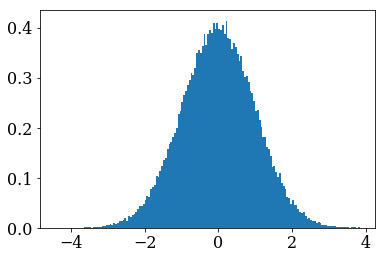

In [44]:
numpy.random.seed(0)
gaussian=numpy.random.normal(loc=0.0, scale=1.0, size=100000)
maxi=numpy.amax(gaussian)
mini=numpy.amin(gaussian)
pyplot.xlim(mini,maxi)
pyplot.hist(gaussian,bins=numpy.arange(mini,maxi,0.05),normed=True);
numpy.random.seed(0)
x=numpy.random.random_sample(100000)
pyplot.plot()

In [27]:
numpy.random.seed(0)
y=numpy.random.normal(0,numpy.sqrt(2),10)
print(y)

numpy.random.seed(0) 
N = 10
K = 1.4

h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    g = numpy.log(1/(1-u1))
    u2 = numpy.random.random_sample()
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        h.append(g)
print(h)        

[ 2.49474675  0.56590775  1.38414453  3.16910155  2.64112584 -1.38207963
  1.34362793 -0.21405142 -0.1459735   0.58067397]
[0.79587450816311001, 0.92322314580406883, 0.55104849109549925, 1.5688961399691683, 0.8394328467388229, 0.073685354912847917]


Ici aucune correspondance entre les points générés n'est observé, on peut donc supposer que la méthode utiliser par l'algorithme "numpy.random.normal()" pour générer une distribution Gaussienne ne correspond pas à la méthode de réjection de Von Neumann.

### 2)  L'algorithme de Box-Muller

Pour l'implémentation de cette algorithme nous nous sommes basé sur la page suivante: 
https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller


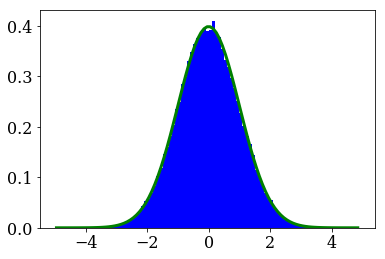

In [48]:
numpy.random.seed(0)
u1=numpy.random.random_sample(100000)
numpy.random.seed(200000)
u2=numpy.random.random_sample(100000)

z0=numpy.sqrt(-2*numpy.log(u1))*numpy.cos(2*pi*u2)
z1=numpy.sqrt(-2*numpy.log(u1))*numpy.sin(2*pi*u2)

binwidth=0.1
bins=numpy.arange(-5.,5., binwidth)
pyplot.hist(z0,bins=numpy.arange(-5,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Plottons aussi notre histogramme pour z1

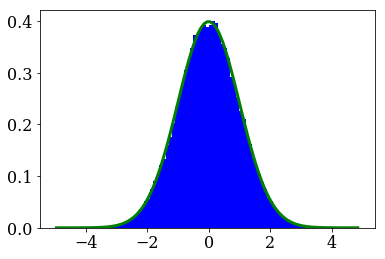

In [49]:
pyplot.hist(z1,bins=numpy.arange(-5,5., binwidth),normed=True,color='blue');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Nous remarquons effectivement que nos deux distribution z0 et z1 correspondent à une distribution gaussienne.

# Notebook 6.3 Brownian motion

Pour commencer nous allons reprendre les algorithme fourni dans le Notebook dans ce chapitre et nous allons faire varier les parametres $\alpha,\mu,npart,\sigma$. 

Commençons par les distributions initiales de particules :

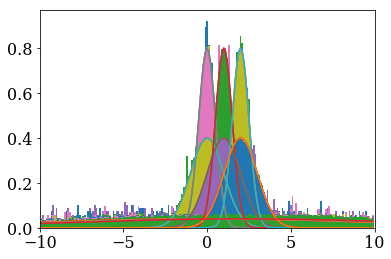

In [30]:
# Generate a set of initial positions based on the Gaussian distribution
npart_l=[1000,10000,100000]
mu_l=[0,1,2]
sigma_l = [0.5,1.0,10]

T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)

for npart in npart_l:
    for mu in mu_l:
        for sigma in sigma_l:
            npart=int(npart)
            x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
# Generate bins centered around 0
            binwidth=0.1
            bins=numpy.arange(-10,10,binwidth)
            bins = bins + binwidth/2

# Compute bin centers
            bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
            pyplot.xlim(-10,10)
            pyplot.hist(x0,bins,normed=True);
            pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

(*) On remarque que l'algorithme numpy.random.normal() semble moins efficace pour de grandes valeurs de l'écart type de notre loi normale (courbe très aplatie du graphique).

Regardons maintenant les différentes trajectoires obtenues pour ces distributions:

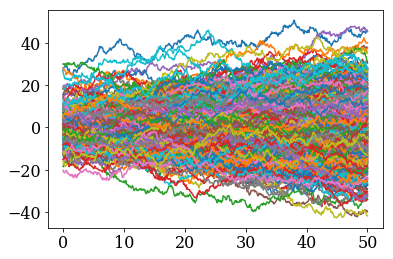

In [31]:
for npart in npart_l:
    for mu in mu_l:
        for sigma in sigma_l:
            npart=int(npart)
            x = numpy.empty([nt+1,npart])
            x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
            x[0]=x0
# Generate bins centered around 0
            for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
                x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
            for i in range(20):
                pyplot.plot(t,x[:,i])

Ce graphique est très brouillon, cependant on observe bien la tendance générale de nos particules à s'étalé dans l'esapce tout en gardant une position moyenne relativement constante.

Regardons finalement les distributions obtenues après la simulation de la diffusion:

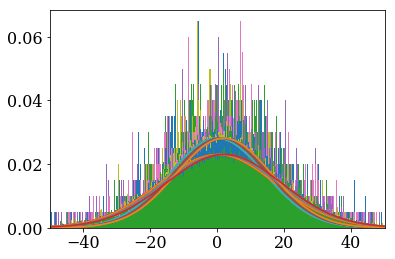

In [32]:
for npart in npart_l:
    for mu in mu_l:
        for sigma in sigma_l:
            npart=int(npart)
            x = numpy.empty([nt+1,npart])
            x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
            x[0]=x0
# Generate bins centered around 0
            for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
                x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
            binwidth=0.2
            bins=numpy.arange(-50,50,binwidth)
            bins = bins + binwidth/2

# Compute bin centers
            bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
            pyplot.xlim(-50,50)
            pyplot.hist(x[nt],bins,normed=True);
            pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

Ca ne fonctionne pas super bien pour certaines combinaisons de variables, essayons donc de faire varier nos parametres $\alpha, \mu, \sigma$ et le nombre de particules en séparant nos graphiques pour voir d'où viennent la divergences de nos résultats par rapport à ceux attendus.



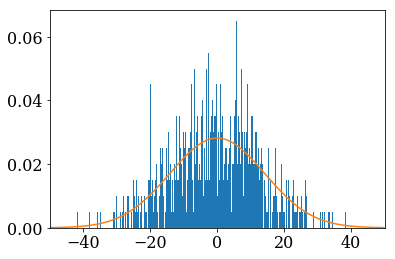

In [33]:
sigma=0.5
npart=1000
mu=0
alpha=2
npart=int(npart)
x = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
x[0]=x0
# Generate bins centered around 0
for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
binwidth=0.2
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

Il semblerait bien que ce soit ce type de ditribution qui pose problème, augmentons le nombres de particules

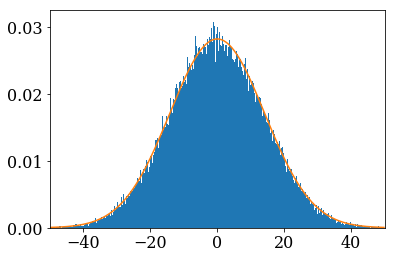

In [34]:
sigma=0.5
npart=100000
mu=0
alpha=2
npart=int(npart)
x = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
x[0]=x0
# Generate bins centered around 0
for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
binwidth=0.2
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

Le problème semblait donc être le manque de particules. Afin de vérifier ceci, prenons des valeurs extrêmes pour les autres variables et voyons ce que cela donne.

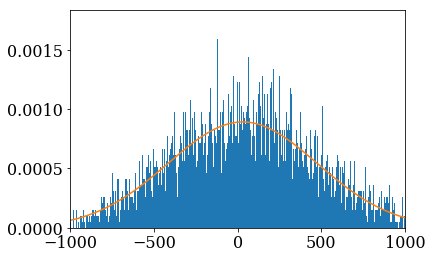

In [35]:
sigma=0.01
npart=100000
mu=30
alpha=2000
npart=int(npart)
x = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
x[0]=x0
# Generate bins centered around 0
for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
binwidth=0.2
bins=numpy.arange(-1000,1000,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-1000,1000)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

Ok le problème vient donc bien du rapport : (nombre de particule/étalement de la distribution finale). Notre algorithme fonctionne donc bien pour toutes valeurs de $\alpha, \mu$ et $\sigma$ à condition que l'on aie un nombre suffisant de particule. Plus sigma et alpha seront grand (i.e.: notre distribution sera étalée au final), plus le nombre de particules nécessaires au bon fonctionnement de notre algorithme sera grand.

# Challenge

## 1) $dx = cdt+\sqrt{2\alpha dt}\mathcal{N}(0,1)$

A priori le terme $cdt$ n'est autre qu'un terme de vitesse $v_0=c$ s'appliquant à chaque particule de notre ensemble. En effet en ignorant le deuxième terme du membre de droite de notre équation on a : $$dx=cdt \Rightarrow \frac{dx}{dt}=c=v$$
Ce qui, en l'absence d'autre effet se résumerait juste par une translation de notre distribution
Simulons la distribution obtenue tout en gardant comme formule théorique le cas correspondant à $dx=\sqrt{2\alpha dt}\mathcal{N}(0,1)$ :

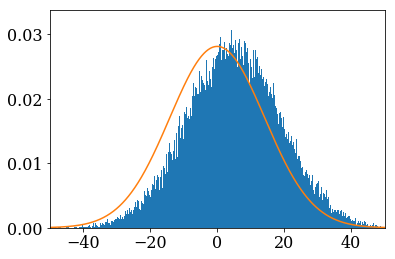

In [36]:
sigma=1
npart=100000
mu=0
alpha=2
c=0.1
npart=int(npart)
x = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
x[0]=x0
# Generate bins centered around 0
for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

Il semblerait que cela décale effectivement notre distribution d'un facteur $cT$ vers la droite introduisons donc la modification $\mu$ -> $\mu+cT$ 

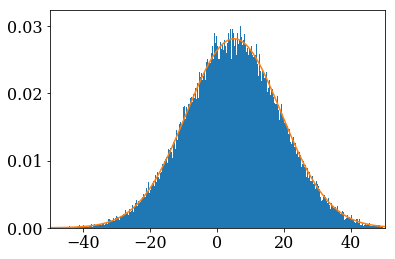

In [37]:
sigma=1
npart=200000
mu=0
alpha=2
c=0.1
npart=int(npart)
x = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
x[0]=x0
# Generate bins centered around 0
for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-50,50)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu-c*T)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

Ok ça fonctionne.

## 2) $dx=-\gamma xdt+\sqrt{2\alpha dt}\mathcal{N}(0,1)$
Résolvons cette fois ci l'équation $$\frac{dx}{x}=-\gamma dt$$
cela nous donne $$x=ke^{-\gamma t}$$
avec $k$ une constante arbitraire.

Simulons la distribution obtenue tout en gardant comme formule théorique le cas correspondant à $dx=\sqrt{2\alpha dt}\mathcal{N}(0,1)$ :

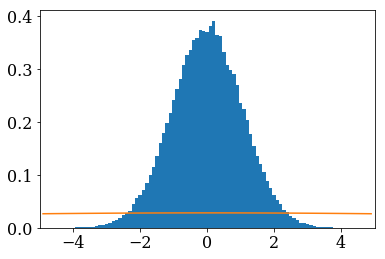

In [38]:
sigma=1
npart=100000
mu=0
alpha=2
g=2
npart=int(npart)
x = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)
x[0]=x0
# Generate bins centered around 0
for i in range(nt):
    #x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]-(g*x[i]*dt)+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*(sigma**2+2*alpha*T)))/numpy.sqrt(2*numpy.pi*(sigma**2+(2*alpha*T))))

On voit cairement que le terme de friction empêche fortement l'étalement de notre gaussienne dans l'espace.
Vérifions que notre distributions devient bien stationnaire lorsque t->$\infty$ pour ce faire nous allons utiliser la L1 norme et voir ci celle-ci appliqué entre deux résultats successifs tend vers 0. on se limitera à une précision de 10-8.

# Notebook 6.4 Ising Model

## Challenge 1

Nous allons vérifier si l'algorithme Metropolis nous donne le bon ratio de *ups* et *down* pour différentes configurations du quadrillage. Récupérons d'abord les fonctions `energy_at_site` `metropolis_at_site` et `initial_state` venant du Notebook 4.

Nous allons analyser l'algorithme Metropolis et voir si un bon ratio de "up" et "down" est donné. Les fonctions que nous aurons besoins sont données dans le Notebook 6.4.

Nous allons aussi créer une liste de quadrillage pour vérifier le ratio sur chacun d'entre eux.

In [45]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    Returns:
    -------
    energy: energy for the given configuration
    """
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])
    return energy

def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]
        

        
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    # Where r=0, we assign a negative spin
    r[r==0] =-1
    return r

def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [46]:
n_quad = 5
nx, ny = 10, 10
#Liste contenant les différents quadrillages
list_of_lattice = []
for i in range(n_quad):
    list_of_lattice.append(initial_state(nx,ny))
    
list_of_lattice=numpy.array(list_of_lattice)

Comparons les 2 ratios, un expérimentale et l'autre théorique. Le théorique étant donné par :
$$\frac{p(\text{up})}{p(\text{down})}=e^{-\Delta E} $$
et l'expérimentale est simplement de compter le nombre de up et de down, de faire la moyenne des 2.
Voici notre code pour ceci :

In [51]:
nmc = 100000

listofup = []
listofdown = []
ratioth= []
alpha = 0.1

for k in range(n_quad):                  #Pour chaque quadrillage on calcul le nombre de spin up/spin down ainsi que ratio_th
    sp = list_of_lattice[k]                     
    states = numpy.empty(nmc+1)
    states[0] = sp[5,5]
    
    ratioth.append(numpy.exp(-1*energy_at_site(sp,alpha,1,5,5)+energy_at_site(sp,alpha,-1,5,5)))

    for n in range(0,nmc):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = nmc - ups
    listofup.append(ups)
    listofdown.append(downs)
    
ratioexp = numpy.array(listofup)/numpy.array(listofdown)
print('Voici le quotien du (ratioThéorique/ratioExpérimentale) pour chaque quadrillage : ', ratioth/ratioexp)

Voici le quotien du (ratioThéorique/ratioExpérimentale) pour chaque quadrillage :  [1.         0.99645748 1.         1.00155117 1.        ]


On remarque que nos ratios rations sont proches l'un avec l'autre étant donné que le facteur ratioth/ratioexp est très proche de 1 a chaque fois.

## Challenge 2

Il nous est maintenant demander de plotter l'énergie moyenne et la magnétisation exprimées comme une fonction de $\alpha$, on a que :

$$<E>=\frac{\sum_k E_k}{N_k} $$
et
$$<M> = \frac{\sum_k M_k}{N_k} $$

La fonction "energy_of_states_and_average" calcule l'énergie pour chaque itérations de l'algorithme Metropolis, ceci nous donnera finalement l'energie moyenne du système.

In [52]:
def energy_of_states_and_average(etats,alpha): 
    
    #states = listes des états pour chaque étape de l'algorithme de Metropolis
    
    #alpha est la constante de couplage 
    
    Elist=[]
    averageE=0
    for k in range(len(etats)):        #On calcule l'énergie pour chaque état 
        E=0
        for j in range(nx):
            for l in range(ny):
                
                E=E + energy_at_site(etats[k],alpha,etats[k][j,l],j,l)  
            Elist.append(E)    #On l'ajoute à la liste
    for m in range(len(etats)):        #On calcule ensuite l'énergie moyenne 
        averageE= averageE + Elist[m]
    averageE=averageE/len(etats)
    
    return numpy.array(Elist),averageE

In [53]:
nx, ny = 10, 10
nmc = 100
sp = initial_state(nx,ny)
alpha = numpy.linspace(0,0.7,100)  
average_energy_alpha = []
for k in range(alpha.size):         
    sp = initial_state(nx,ny)
    average_energy_alpha.append(energy_of_states_and_average(ising_model_metropolis(sp, nmc, nx, ny, alpha[k]),alpha[k])[1])


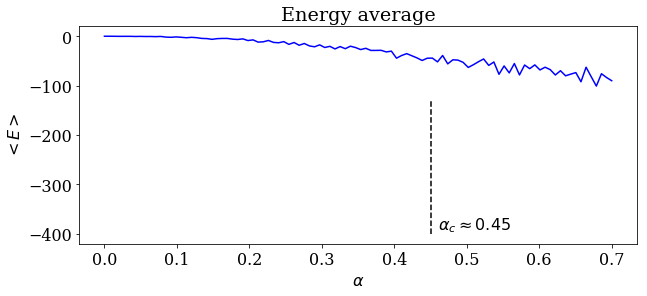

In [54]:
fig, ax = pyplot.subplots(figsize=(10,4))

ax.plot(alpha,numpy.array(average_energy_alpha),'b')
ax.plot([0.45,0.45],[-400,-130],'k--')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$<E>$')
ax.set_title('Energy average')
ax.annotate(r'$\alpha_c \approx 0.45$',xy=(0.46,-390), xytext=(0.46, -390))

pyplot.show()

Nous recommençons tout le processus pour la magnétisation cette fois-ci. On a alors :

In [55]:
def magnetisation_of_states_and_average(etats): 
    Mlist=[]
    averageM=0
    for k in range(len(etats)):        #On calcule la magnétisation pour chaque état 
        M=0
        for j in range(nx):
            for l in range(ny):
                
                M=M + etats[k][j,l]
            Mlist.append(M)    
    for m in range(len(etats)):        
        averageM= averageM + Mlist[m]     #On calcule <M>
    averageM=averageM/len(etats)
    
    return averageM

In [56]:
nx, ny = 10, 10
nmc = 100
sp = initial_state(nx,ny)
alpha = numpy.linspace(0,0.7,100)  
averageM = []
for k in range(alpha.size):                    #On utilise l'algorithme de Metropolis pour chaque alpha différent
    sp = initial_state(nx,ny)
    averageM.append(magnetisation_of_states_and_average(ising_model_metropolis(sp, nmc, nx, ny, alpha[k])))

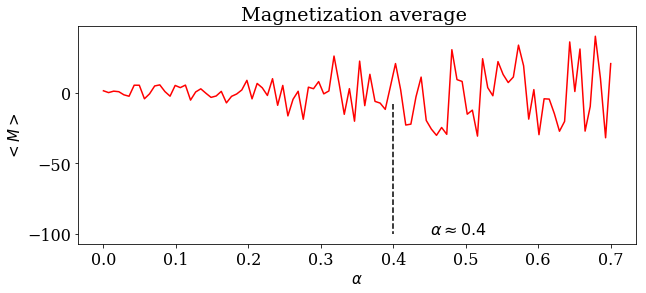

In [57]:
fig, ax = pyplot.subplots(figsize=(10,4))

ax.plot(alpha,numpy.array(averageM),'r')

ax.plot([0.4,0.4],[-8,-100],'k--')

ax.set_xlabel(r'$\alpha$',fontsize = 15)
ax.set_ylabel(r'$<M>$',fontsize = 15)
ax.set_title('Magnetization average ')
ax.annotate(r'$\alpha\approx 0.4$ ', xy=(0.45, -100), xytext=(0.45, -100))

pyplot.show()

#### $\alpha$ critique 

Il est possible de pousser la précision de la mesure de $\alpha$ en prenant un NMC = 10000. Cependant cette opération prends un temps considérablement plus long, voilà pourquoi cette mesure n'est pas reprise dans ce travail. Normalement, la vraie valeur de alpha se trouve lorsque NMC = $\infty$. A l'aide de cette augmentation du nombre NMC on trouve la valeur de alpha suivante :

$$\alpha_c \simeq 0.43 $$

Les graphique de l'énergie moyenne et de la magnétisation moyenne indique que la valeur de $\alpha_{\text{critique}}$ se situe autour des $\alpha\approx0.4$, nous avons choisis cette valeur car de notre point de vue, la fonction devient chaotique à partir de ce moment là. Evidemment cela reste très approximatif car il est dur d'évaluer sur le graphique où exactement $<M>$ devient non-null, et c'est rendu assez difficile par les légères fluctuations.
Grâce à [9], on sait que la valeur théorique de $\alpha$ se situe aux alentours des 

Pour la valeur moyenne de $<M>$ les choses ce compliquent, il est bien plus difficile d'établir précisement une valeur pour $\alpha_{\text{critique}}$. La valeur théorique de $\alpha$ est en fait 

$$\alpha = \frac{J}{k_BT_c} = \frac{\ln\left(1+\sqrt{2}\right)}{2} \simeq 0.440687 $$

Avec peu de précision, on voit que nous sommes dans la région voulue pour $\alpha$.